Text(0, 0.5, 'end-to-end delay (us)')

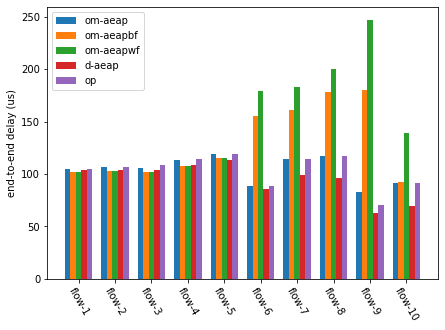

In [1]:
import csv
%matplotlib inline
import numpy as np
import os
import re
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

DIR_NAME = './solutions/'
FIG_SIZE = (7, 5)  # height * width
BAR_WIDTH = 0.15  # width of bar

filenames = os.listdir(DIR_NAME)
filenames_dict = {
    'om-aeap': [],
    'om-aeapbf': [],
    'om-aeapwf': [],
    'd-aeap': [],
    # 'd-aeapbf': [],
    # 'd-aeapwf': [],
    'op': []
}

for filename in filenames:
    if re.match(r'b.*backtracking.*aeap\.csv', filename):
        filenames_dict['om-aeap'].append(filename)
    elif re.match(r'b.*backtracking.*aeapbf\.csv', filename):
        filenames_dict['om-aeapbf'].append(filename)
    elif re.match(r'b.*backtracking.*aeapwf\.csv', filename):
        filenames_dict['om-aeapwf'].append(filename)
    elif re.match(r'b.*dijkstra.*aeap\.csv', filename):
        filenames_dict['d-aeap'].append(filename)
    # elif re.match(r'b.*dijkstra.*aeapbf\.csv', filename):
    #     filenames_dict['d-aeapbf'].append(filename)
    # elif re.match(r'b.*dijkstra.*aeapwf\.csv', filename):
    #     filenames_dict['d-aeapwf'].append(filename)
    elif re.match(r'o.*backtracking.*aeap\.csv', filename):  # only care about om-aeap
        filenames_dict['op'].append(filename)

fig, ax = plt.subplots(figsize=FIG_SIZE)
ax.set_title('')
labels = ['flow-{}'.format(i) for i in range(1, 20)]  # flows no.
x = np.arange(len(labels))

i = 0
for alias, filenames in filenames_dict.items():
    filename = filenames[0]  # take first file
    y = []
    with open(os.path.join(DIR_NAME, filename), 'r') as file:
        reader = csv.reader(file)
        for line in reader:
            y.append(int(line[1]) / 1000)  # delay
    x = x[:10]
    y = y[:10]
    if i < 2:
        ax.bar(x - BAR_WIDTH * (2 - i), y, width=BAR_WIDTH, label=alias)
    elif i == 2:
        ax.bar(x, y, width=BAR_WIDTH, label=alias)
    else:
        ax.bar(x + BAR_WIDTH * (i - 2), y, width=BAR_WIDTH, label=alias)
    i += 1
plt.xticks(rotation=-60)
ax.set_xticks(x)
labels = labels[:10]
ax.set_xticklabels(labels)
ax.legend()
ax.set_ylabel('end-to-end delay (us)')